## 経験（データ）によってタスクを解くときのパフォーマンスが改善する簡単な例

機械学習が経験Eの蓄積によってあるタスクTを解いたときのパフォーマンスPが向上する最も簡単な例として線形回帰を考えます。
この場合、経験はデータ量、タスクが回帰式における係数を推測すること、パフォーマンスは回帰係数の誤差が小さいほど高い、という状況設定となります。
データ量が増加するにつれ正確に係数が推測される様子を見てみましょう。

我々は全知全能の神である状況を考え、データを生成する元が線形回帰 $ y = 5 x + \mathcal{N}(3,1) $ であることを知っているとしましょう。
ここで、 $ \mathcal{N}(\mu,\sigma) $ は平均が $\mu$ で分散が $\sigma$ である正規分布です。
この式からにデータを生成し、生成するデータ数が増加するとともに係数の推測精度が向上することを確認してみましょう。

まず、データ数を10個生成する場合を見てみます。

In [1]:
### import modules
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

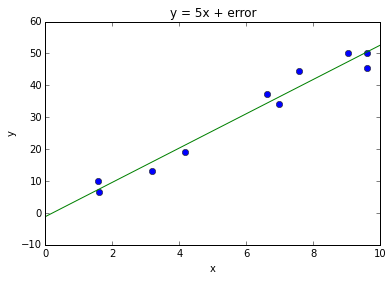

slope :  5.37608511765 standard error :  0.358606362212


In [9]:
### create samples
sample_size = 10
err_sigma = 3

### generate data points
x = np.random.rand(sample_size, 1)*10
err = err_sigma*np.random.randn(sample_size, 1)
y = 5 * x  + err

### train a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(),y.flatten())

### make predictions
xt = np.linspace(0.0, 10, num=1000).reshape((1000, 1))
yt = xt*slope + intercept

### plot samples and regression result
plt.plot(x, y, "o")
plt.plot(xt, yt)
plt.title("y = 5x + error")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### estimate coeffieients of the regression
print "slope : ", slope, "standard error : ", std_err

標準誤差が大きいため、係数の推測結果はセルの実行毎に大きく変わることに注意して下さい。

次にデータ数を100個にした場合を見てみましょう。

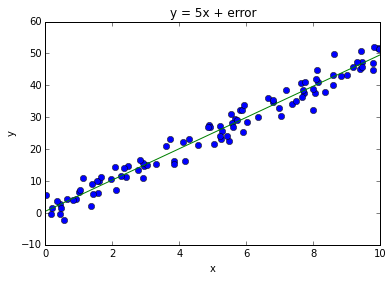

slope :  4.90505753593 standard error :  0.0913114469753


In [3]:
### create samples
sample_size = 100
err_sigma = 3

### generate data points
x = np.random.rand(sample_size, 1)*10
err = err_sigma*np.random.randn(sample_size, 1)
y = 5 * x  + err

### train a linear regression model
#reg = LinearRegression()
#reg.fit(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(),y.flatten())

### make predictions
xt = np.linspace(0.0, 10, num=1000).reshape((1000, 1))
yt = xt*slope + intercept

### plot samples and regression result
plt.plot(x, y, "o")
plt.plot(xt, yt)
plt.title("y = 5x + error")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### estimate coeffieients of the regression
print "slope : ", slope, "standard error : ", std_err

データ数を増やすと誤差は減り、推測の精度が高まっていることが見て取れます。
これは非常に簡単な例ですが、データ量によってパフォーマンスが高まるという機械学習の本質的な性質を示しています。

興味ある読者は更にデータ数を増やし、データ数と誤差の数学的な関係を考えてみるとよいでしょう。